## Group plots

Created: 10/24/2017 (cloned from part2_analysis_wasp21)

Last edit: 10/24

In [1]:
!python --version

Python 3.6.1 :: Continuum Analytics, Inc.


In [2]:
import os
os.environ['CONDA_DEFAULT_ENV']

'astroconda35'

## Introduction: M-R relation

In [3]:
# Python 2 and 3 compatible
try:
    from urllib.request import urlopen, Request
    from urllib.error import HTTPError
except ImportError:
    from urllib2 import urlopen, Request, HTTPError
import time
import warnings
warnings.filterwarnings('ignore')

url = 'http://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=exoplanets'
pl_params = "pl_hostname,pl_letter,pl_discmethod,pl_disc,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_orbincl,pl_bmassj,pl_radj,pl_radjerr1,pl_radjerr2,pl_dens,pl_instrument,pl_insol,pl_eqt,"
pl_err = 'pl_bmassjerr1,pl_bmassjerr2,pl_bmassjerr1,pl_bmassjerr2,pl_orbpererr1,pl_orbpererr2,'
st_params = "st_optmag,ra,dec,st_dist,st_teff,st_mass,st_rad,st_plx,gaia_plx,gaia_dist,st_pm,gaia_pm,st_radv,st_spstr,st_logg,st_lum,st_dens,st_metfe,st_age,st_acts,st_bmvj,st_jmh2,"
others = 'pl_instrument,pl_telescope,rowupdate,st_nplc,pl_def_refname,pl_disc_refname,pl_pelink'
full_url= url+'&select='+ pl_params + pl_err + st_params+others

response = urlopen(full_url)
html = response.read()

import getpass
uname=getpass.getuser()

outdir = 'home/'+uname+'/data/transit/nexsci'
fname = 'confirmed_planets_extended_{}.csv'.format(time.strftime("%Y%m%d")) #include date of download
outpath =os.path.join(outdir,fname)

print("Downloading data from URL:\n{}".format(url))

if not os.path.exists(fname):
    with open(fname,'wb') as f:
         f.write(html)
    print("Saved file as {}".format(fname))
else:
    print("Reading {}".format(outpath))
    
import pandas as pd

df = pd.read_csv(fname)
df.head(3)

http://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=exoplanets
Reading home/jp/data/transit/nexsci/confirmed_planets_extended_20171028.csv


,pl_hostname,pl_letter,pl_discmethod,pl_disc,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_orbincl,pl_bmassj,...,st_acts,st_bmvj,st_jmh2,pl_instrument.1,pl_telescope,rowupdate,st_nplc,pl_def_refname,pl_disc_refname,pl_pelink
0,HD 106270,b,Radial Velocity,2011,1,2890.0,4.30,0.402,NaN,11.00,...,NaN,0.742,0.285,HIRES Spectrometer,10 m Keck I Telescope,2014-05-14,0,Johnson et al. 2011,Johnson et al. 2011,http://exoplanet.eu/catalog/hd_106270_b/
1,HD 106515 A,b,Radial Velocity,2012,1,3630.0,4.59,0.572,NaN,9.61,...,NaN,0.821,0.367,CORALIE Spectrograph,1.2 m Leonhard Euler Telescope,2014-05-14,0,Marmier et al. 2013,Marmier et al. 2013,http://exoplanet.eu/catalog/hd_106515_a_b/
2,HD 106906,b,Imaging,2013,1,NaN,650.00,NaN,NaN,11.00,...,NaN,0.440,0.187,Clio2 Camera,6.5 m Magellan II Clay Telescope,2014-05-14,0,Bailey et al. 2014,Bailey et al. 2014,http://exoplanet.eu/catalog/hd_106906_b/


In [4]:
hatp44b = df.query('pl_hostname == "HAT-P-44" and pl_letter == "b"')
hatp12b = df.query('pl_hostname == "HAT-P-12" and pl_letter == "b"')
corot5b = df.query('pl_hostname == "CoRoT-5" and pl_letter == "b"')
wasp21b = df.query('pl_hostname == "WASP-21" and pl_letter == "b"')

In [5]:
pl.legend?

Object `pl.legend` not found.


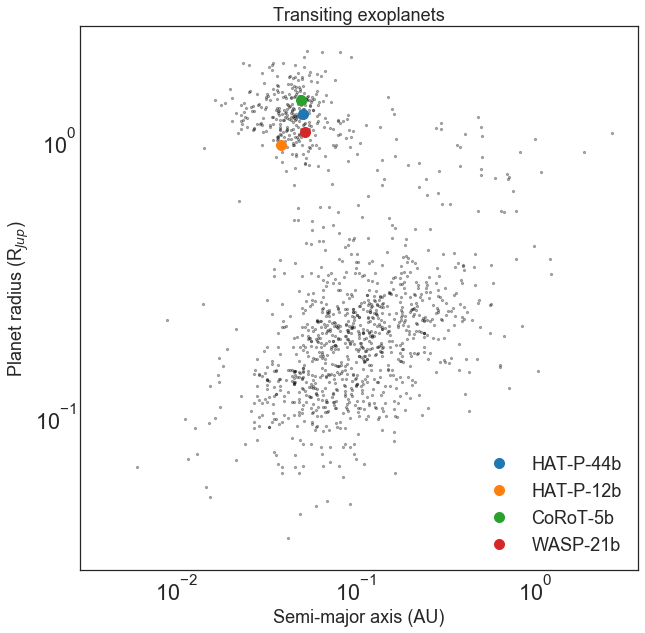

In [6]:
import matplotlib.pyplot as pl
%matplotlib inline
pl.style.use('seaborn-white')
import matplotlib
matplotlib.rcParams.update({'font.size': 18})
pl.rcParams['ytick.labelsize'] = 'large'
pl.rcParams['xtick.labelsize'] = 'large'
fontsize=18

fig,ax=pl.subplots(1,1,figsize=(10,10))

transiting = df[df['pl_discmethod'] == 'Transit']

transiting.plot(x='pl_orbsmax',y='pl_radj', 
                kind='scatter',ax=ax, marker='.', 
                color='k', alpha=0.3)


for d in [hatp44b,hatp12b,corot5b,wasp21b]: 
    ax.plot(d['pl_orbsmax'],d['pl_radj'], 'o', ms=10, label=str(d))
    
labels='HAT-P-44b,HAT-P-12b,CoRoT-5b,WASP-21b'.split(',')
pl.legend(labels,loc='best',fontsize=fontsize)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Semi-major axis (AU)',fontsize=fontsize)
ax.set_ylabel('Planet radius (R$_{Jup}$)',fontsize=fontsize)
ax.set_title('Transiting exoplanets',fontsize=fontsize)

## Density

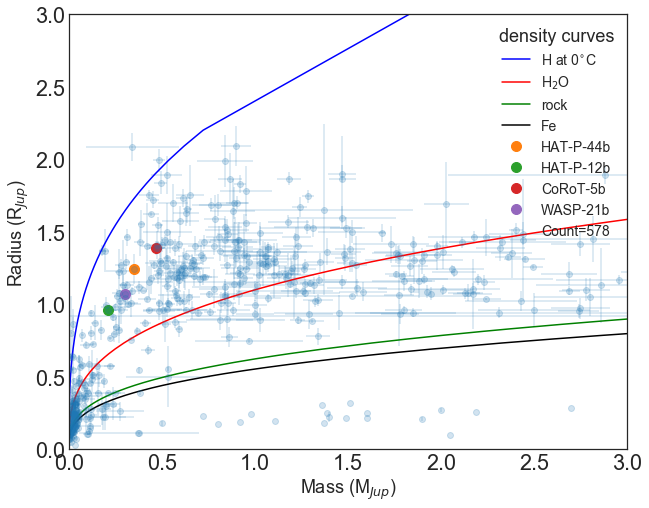

In [7]:
import numpy as np

mass_h2O, mass_Fe, mass_rock, mass_H = [],[],[],[]#,[], []

rho_h2O, rho_Fe, rho_rock, rho_H= 1000, 7874, 5510, 89.88#, 11340, 21450 #kg/m3
Mjup,Rjup=1.898e27,6.9911e7

rad = df['pl_radj'].sort_values()
for r in rad*Rjup:
    mass_h2O.append(4./3.*np.pi*rho_h2O*(r)**3) #kg
    mass_Fe.append(4./3.*np.pi*rho_Fe*(r)**3) #kg
    mass_rock.append(4./3.*np.pi*rho_rock*(r)**3) #kg
    mass_H.append(4./3.*np.pi*rho_H*(r)**3) #kg
    #mass_lead.append(4./3.*np.pi*rho_lead*(r)**3) #kg
    #mass_iridium.append(4./3.*np.pi*rho_iridium*(r)**3) #kg

count=len(df.query('pl_radj > 0 and pl_bmassj > 0'))

fig, ax1 = pl.subplots(1,1,figsize=(10,8))
errbar = ax1.errorbar(x=df['pl_bmassj'], y=df['pl_radj'], 
             xerr=df['pl_bmassjerr1'], yerr=df['pl_radjerr1'],
             fmt='o', alpha=0.2, label='Count={}'.format(count))
#plt.xlim([0,13])
#plt.ylim([0,3])
   
masses=[mass_H,mass_h2O,mass_rock,mass_Fe]
labels = ['H at 0$^{\circ}$C','H$_2$O','rock','Fe']#,'Lead','Iridium']
colors=['b-','r-','g-','k-']#,'c-','m-']

for m,c,label in zip(masses,colors,labels):
     ax1.plot(np.array(m)/Mjup, rad, c,label=label)

#with low density exoplanets

labels='HAT-P-44b,HAT-P-12b,CoRoT-5b,WASP-21b'.split(',')
for d,l in zip([hatp44b,hatp12b,corot5b,wasp21b],labels): 
    ax1.plot(d['pl_bmassj'],d['pl_radj'], 'o', ms=10, label=l)
    
ax1.set_xlim([0,3])
ax1.set_ylim([0,3])
ax1.set_xlabel('Mass (M$_{Jup}$)',fontsize=fontsize)
ax1.set_ylabel('Radius (R$_{Jup}$)',fontsize=fontsize)
ax1.legend(loc=1, title='density curves', fontsize=14)

## Surface gravity

(0.1, 10000.0)

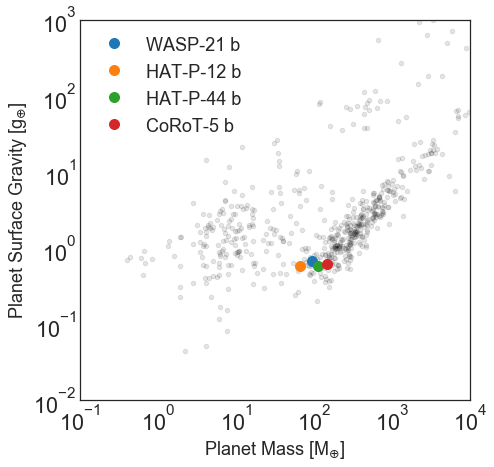

In [10]:
from astropy import constants as const

pl.style.use('seaborn-white')

#see Sing+2016
#WASP-17,HAT-P-1,HD209458,WASP-39,WASP-31,WASP-19,WASP-12,HD189733,WASP-6

HJ_planets='WASP-21,HAT-P-12,HAT-P-44,CoRoT-5'.split(',')
plot_HJ = True

M_J = const.M_jup #kg
R_J = const.R_jup #m
M_E = const.M_earth
R_E = const.R_earth
G=6.67408e-11 #m3 kg-1 s-2
g_E = G*M_E/R_E**2

fig,ax=pl.subplots(1,1,figsize=(7,7))
#convert to kg and m and then to Earth units
#GM/R**2
df['pl_bmass']=df['pl_bmassj']*M_J
df['pl_bmassE']=df['pl_bmassj']*M_J/M_E
df['pl_g_E']=G/g_E*(df['pl_bmassj']*M_J)/(df['pl_radj']*R_J)**2 #not pl_logg
df.plot(x='pl_bmassE',y='pl_g_E', kind='scatter',ax=ax,alpha=0.1,color='k');

if plot_HJ==True:
    for i in HJ_planets:
        try:
            d=df.query('pl_hostname == "{}" and pl_letter == "b"'.format(i))
            d.plot(x='pl_bmassE',y='pl_g_E', marker='o',
                   ms=10,label=i+' b',ax=ax,linestyle='')
        except:
            pass
ax.set_xlabel('Planet Mass [M$_{\oplus}$]',fontsize=fontsize)
ax.set_ylabel('Planet Surface Gravity [g$_{\oplus}$]',fontsize=fontsize)
ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-2,1e3)
ax.set_xlim(1e-1,1e4)